In [ ]:
!unzip /content/drive/MyDrive/finaldataset -d /content/drive/MyDrive/finaldataset

Archive:  /content/drive/MyDrive/finaldataset.zip
replace /content/drive/MyDrive/finaldataset/finaldataset/Benjamin_Netanyau/0.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Accesing subfolder 

In [1]:
folder = '/content/drive/MyDrive/finaldataset'


In [2]:
import os
os.listdir(folder)

['Magaret_Tarcher',
 'Benjamin_Netanyau',
 'Nelson_Mandela',
 'Julia_Gillard',
 'Jens_Stoltenberg',
 'finaldataset']

In [3]:
import librosa
import IPython.display as ipd
import numpy as np

In [4]:
audiopath1 = '/content/drive/MyDrive/finaldataset/finaldataset/Benjamin_Netanyau'
audiopath2 = '/content/drive/MyDrive/finaldataset/finaldataset/Jens_Stoltenberg'
audiopath3 = '/content/drive/MyDrive/finaldataset/finaldataset/Julia_Gillard'
audiopath4 = '/content/drive/MyDrive/finaldataset/finaldataset/Nelson_Mandela'
audiopath5 = '/content/drive/MyDrive/finaldataset/finaldataset/Magaret_Tarcher'

for root , dirs , files in os.walk(audiopath1):
  print(files)

['194.wav', '1428.wav', '193.wav', '1393.wav', '232.wav', '1381.wav', '1360.wav', '1328.wav', '179.wav', '1425.wav', '1427.wav', '1394.wav', '1342.wav', '177.wav', '1403.wav', '134.wav', '219.wav', '1469.wav', '1408.wav', '1472.wav', '143.wav', '201.wav', '156.wav', '1420.wav', '1357.wav', '1461.wav', '1405.wav', '1446.wav', '1411.wav', '136.wav', '1338.wav', '190.wav', '1400.wav', '1355.wav', '189.wav', '1478.wav', '230.wav', '1340.wav', '1392.wav', '1380.wav', '1453.wav', '1349.wav', '196.wav', '137.wav', '1332.wav', '1442.wav', '1454.wav', '181.wav', '1370.wav', '1499.wav', '183.wav', '1457.wav', '1479.wav', '1371.wav', '1364.wav', '165.wav', '204.wav', '210.wav', '1494.wav', '1359.wav', '1485.wav', '150.wav', '212.wav', '1474.wav', '152.wav', '2.wav', '23.wav', '172.wav', '1343.wav', '1447.wav', '151.wav', '1367.wav', '1497.wav', '1495.wav', '178.wav', '18.wav', '133.wav', '203.wav', '1391.wav', '1435.wav', '1397.wav', '1464.wav', '1468.wav', '1395.wav', '1476.wav', '1444.wav', '13

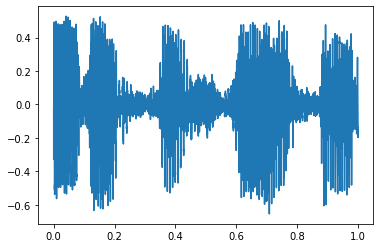

In [5]:
trail_audio = '/content/drive/MyDrive/finaldataset/finaldataset/Benjamin_Netanyau/760.wav'
ipd.Audio('/content/drive/MyDrive/finaldataset/finaldataset/Benjamin_Netanyau/5.wav')
a,b = librosa.load(trail_audio);
import matplotlib.pyplot as plt
time = np.arange( 0 , len(a)) / b
plt.plot(time ,a)
plt.show()

0.05324842


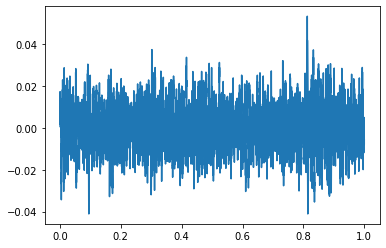

In [32]:
# this is empty part of speech so we can clearly see its amplitude is very less compare to segment which actually has audio content
trail_audio1 = '/content/drive/MyDrive/finaldataset/finaldataset/Benjamin_Netanyau/5.wav'
a1,b1 = librosa.load(trail_audio1);
time1 = np.arange( 0 , len(a1)) / b1
plt.plot(time1 ,a1)
fr = max(a1)
print(fr)
plt.show()

# **Feature extraction using librosa**

In [7]:
""" extracting first 13 cosine coefficient of the log - spectrum as they corresponds
  to low frequecy which contains envelop required for audio characteristic or envelope(vocal tract frequency) 
  while higher freq corresponds to minute details.
"""

def features_extractor(file_name , audio , sample_rate):
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
  # converting 2D features into 1D by taking average of individual co-efficient across all frames
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features

In [31]:
def get_list(label , audiopaths):
  features1 = []
  for root , dirs , files in os.walk(audiopaths):
    for myfile in files:
      audio, sample_rate = librosa.load(os.path.join(audiopaths , myfile), res_type='kaiser_fast')
      # as observed above we would only preprocess the audio whose amplitude > 0.1 else it suggests that segment is one of the empty part of audio
      if max(audio)>0.1:
        getfeature = features_extractor(os.path.join(audiopaths , myfile) , audio , sample_rate)
        my_label = label
        features1.append([getfeature , my_label])
  return features1

In [9]:
from librosa.core.constantq import audio
mydictionary = {'Benjamin_Netanyau' : audiopath1 ,
                'Jens_Stoltenberg': audiopath2 ,
                'Julia_Gillard': audiopath3 ,
                'Nelson_Mandela': audiopath4 ,
                'Magaret_Tarcher': audiopath5}

# Combined featurelist

In [10]:
'''
traversing through each folder and combining into final feature list
'''

finalfeature = []
for speaker in mydictionary:
  getpath = mydictionary[speaker]
  indifeature = get_list(speaker , getpath)
  finalfeature.append(indifeature)

In [11]:
'''
function to create dataframe for our 2 dimentinal list and combining lastly
'''
import pandas as pd
def mydataframe(frames):
  indiframe = pd.DataFrame(frames , columns=['voicefeatures' , 'speaker'])
  return indiframe


# Creating Dataframe

In [12]:
framing = []
for frames in finalfeature:
  getframe = mydataframe(frames)
  framing.append(getframe)
  

In [13]:
finalframes = pd.concat(framing)

In [14]:
finalframes = finalframes.sample(frac = 1)
print(finalframes)

                                          voicefeatures            speaker
1497  [-108.32447, 121.2481, -12.618791, 70.18374, -...     Nelson_Mandela
867   [-90.951675, 119.84343, -31.299507, 75.06275, ...     Nelson_Mandela
259   [-299.8799, 96.67022, -37.36447, 43.87518, 11....  Benjamin_Netanyau
197   [-216.78902, 87.33837, -54.679947, 50.547398, ...   Jens_Stoltenberg
219   [-108.55573, 124.644875, -47.423275, 63.997643...      Julia_Gillard
...                                                 ...                ...
44    [-294.46848, 112.26358, -23.92971, 57.327682, ...  Benjamin_Netanyau
477   [-312.16794, 98.969925, -35.119003, 57.842907,...  Benjamin_Netanyau
970   [-168.03133, 142.70184, -56.738132, 59.486168,...   Jens_Stoltenberg
24    [-137.91669, 148.89911, -70.03521, 52.67108, -...  Benjamin_Netanyau
444   [-163.6758, 118.98486, -35.720592, 73.55595, -...   Jens_Stoltenberg

[7248 rows x 2 columns]


# Creating CSV file of Dataframe

In [ ]:
''' Saving our final dataframe into
    CSV file so we do not need to extract features again.
'''
#finalframes.to_csv('/content/drive/MyDrive/metadata.csv')

In [ ]:
# import pandas as panda

In [ ]:
#df = panda.read_csv('/content/drive/MyDrive/metadata.csv' , dtype = object)
#df = panda.DataFrame(df)

In [ ]:
#df.head()
# we need to jumble the dataframes as it contains speaker categorywise

#df = df.sample(frac = 1)

,Unnamed: 0,voicefeatures,speaker
0,0,[ -67.50494 130.9896 -159.15288 5...,Benjamin_Netanyau
1,1,[-9.0366417e+01 1.1678792e+02 -1.3628354e+02 ...,Benjamin_Netanyau
2,2,[ -95.34265 126.24473 -141.69981 5...,Benjamin_Netanyau
3,3,[-5.2699886e+01 1.3917502e+02 -1.5571051e+02 ...,Benjamin_Netanyau
4,4,[-1.7422803e+02 1.5821219e+02 -5.6552784e+01 ...,Benjamin_Netanyau


# Preprocessing Data

In [15]:
y = np.array(finalframes['voicefeatures'].tolist())
print(y)

[[-108.32447    121.2481     -12.618791  ...    1.1276323  -19.534714
    12.849133 ]
 [ -90.951675   119.84343    -31.299507  ...   -4.2921095  -14.64538
     1.2080747]
 [-299.8799      96.67022    -37.36447   ...   -1.7963139  -13.519715
    -4.014631 ]
 ...
 [-168.03133    142.70184    -56.738132  ...  -10.099091   -20.038649
     1.0235604]
 [-137.91669    148.89911    -70.03521   ...   -4.006937   -23.734034
    -7.9631987]
 [-163.6758     118.98486    -35.720592  ...   -2.4339948  -16.044117
    -2.5764396]]


In [16]:
Y_raw = np.array(finalframes['speaker'].tolist())

In [17]:
h = finalframes['speaker'].tolist()
h

['Nelson_Mandela',
 'Nelson_Mandela',
 'Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Jens_Stoltenberg',
 'Nelson_Mandela',
 'Nelson_Mandela',
 'Benjamin_Netanyau',
 'Benjamin_Netanyau',
 'Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Magaret_Tarcher',
 'Jens_Stoltenberg',
 'Jens_Stoltenberg',
 'Benjamin_Netanyau',
 'Julia_Gillard',
 'Julia_Gillard',
 'Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Magaret_Tarcher',
 'Benjamin_Netanyau',
 'Benjamin_Netanyau',
 'Magaret_Tarcher',
 'Benjamin_Netanyau',
 'Benjamin_Netanyau',
 'Julia_Gillard',
 'Julia_Gillard',
 'Jens_Stoltenberg',
 'Benjamin_Netanyau',
 'Julia_Gillard',
 'Benjamin_Netanyau',
 'Nelson_Mandela',
 'Magaret_Tarcher',
 'Magaret_Tarcher',
 'Magaret_Tarcher',
 'Julia_Gillard',
 'Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Julia_Gillard',
 'Nelson_Mandela',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Julia_Gillard',
 'Nelson_Mandela',
 'Julia_Gillard',
 'Nelson_Mandela',
 'Jens_Stoltenberg'

In [18]:
from tensorflow import keras
from keras.utils import to_categorical

In [19]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [20]:
objenco = LabelEncoder()

In [21]:
Y_raw = to_categorical(objenco.fit_transform(Y_raw))

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(y,Y_raw,test_size=0.2,random_state = 0) 

In [23]:
Y_raw

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# Model training using Neural Network

In [24]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
!pip install keras_tuner
import keras_tuner
from keras_tuner.tuners import RandomSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00


In [25]:
X_train.shape
Y_train.shape

(5798, 5)

In [26]:
def model_test(hp):
  model = Sequential()
  #base layer of our model
  model.add(layers.Dense(units = hp.Int('units' ,
                                        min_value = 10 ,
                                        max_value = 512 ,
                                        step = 64),
                          activation = 'relu' ,
                          input_shape = (13 ,)))
  
  #second layer of our model
  model.add(layers.Dense(units = hp.Int('units' ,
                                        min_value = 10 ,
                                        max_value = 512 ,
                                        step = 64),
                          activation = 'relu'))  

  #third layer of our model
  model.add(layers.Dense(units = hp.Int('units' ,
                                        min_value = 10 ,
                                        max_value = 512 ,
                                        step = 64),
                          activation = 'relu'))  
  #final layer
  model.add(layers.Dense(units = 5 , activation = 'softmax'))


  #compiling model
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate' , values = [1e-2 , 1e-3 , 1e-4])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [29]:
tuner = RandomSearch(
    model_test,
    objective = 'val_accuracy',
    max_trials= 3,
    project_name = 'speaker_prediction'
)

In [30]:
tuner.search(X_train , Y_train , epochs = 100 , validation_data = (X_test , Y_test))

Trial 3 Complete [00h 02m 23s]
val_accuracy: 0.9910345077514648

Best val_accuracy So Far: 0.9924138188362122
Total elapsed time: 00h 08m 11s


In [ ]:
tuner.search_space_summary

<bound method BaseTuner.search_space_summary of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x7fd13c7adeb0>>

In [ ]:
finalframes.head()

,voicefeatures,speaker
447,"[-90.76863, 98.95256, -45.84049, 83.491486, -4...",Nelson_Mandela
154,"[-91.04241, 133.87482, -61.947525, 51.952103, ...",Julia_Gillard
1114,"[-131.9232, 164.75073, -67.549675, 45.510338, ...",Benjamin_Netanyau
1234,"[-161.01068, 116.54477, -65.57888, 65.46923, -...",Benjamin_Netanyau
640,"[-55.207703, 184.21718, -153.78575, 27.41021, ...",Magaret_Tarcher


# Saving model with most optimal hyperparameter

In [ ]:
best_model = tuner.get_best_models()[0]


In [ ]:
from keras.models import load_model

In [ ]:
best_model.save('/content/drive/MyDrive/finalspeaker_pred.h5')

# predicting for single testaudio

In [ ]:
testlocation = '/content/drive/MyDrive/Nelson Mandela Speech - Freedom and Justice.mp3'

In [ ]:
!pip install pydub
from pydub import AudioSegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mysound = AudioSegment.from_mp3(testlocation)
AudioSegment.converter = 'ffmpeg.exe'
AudioSegment.ffmpeg = 'ffmpeg.exe'
AudioSegment.ffprobe = 'ffprobe.exe'

In [ ]:
startmin = 5
startsec = 11
endmin = 5
endsec = 12
starttime = startmin*60*1000 + startsec*1000
endtime = endmin*60*1000 + endsec*1000


In [ ]:
get_sound = mysound[starttime : endtime]

In [ ]:
output_file = '/content/drive/MyDrive/testing1audio.wav'
get_sound.export(output_file, format="wav")

<_io.BufferedRandom name='/content/drive/MyDrive/testing1audio.wav'>

In [ ]:
finaltest = '/content/drive/MyDrive/testing1audio.wav'
ipd.Audio(finaltest)

In [ ]:
u = '/content/drive/MyDrive/finaldataset/finaldataset/Julia_Gillard/11.wav'

In [ ]:
audio2, sample_rate2 = librosa.load(u, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=13)
mfccs_scaled_features1 = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features1=mfccs_scaled_features1.reshape(1,-1)
predictmyaudio = best_model.predict(mfccs_scaled_features1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
classes_x=np.argmax(predictmyaudio,axis=1)

In [ ]:
prediction_class = objenco.inverse_transform(classes_x)

In [ ]:
prediction_class

array(['Julia_Gillard'], dtype='<U17')

In [ ]:
finalframes.shape

(7248, 2)